**Tugas Besar 1**

Setiap baris Data Frame ini milik pasar petani di benua Amerika Serikat dengan berbagai informasi tentang pasar yang terdapat di kolom-kolomnya. Dalam TB1 ini, jelajahi kolom-kolom data untuk membiasakan diri dengan data tersebut untuk analisis dan pembuatan grafik yang menurut Anda sesuai.

Anda telah mempelajari konsep dari Exploratory Data Analysis. Lakukan identifikasi data dengan menggunakan konsep EDA. Apakah ada wawasan yang menarik yang dapat digali lebih dalam dari data tersebut dan berikan kesimpulan dari olah data Anda.


**Hasil Exploratory Data Analysis (EDA) Awal**

Dataset ini berisi 5.343 baris data yang mewakili pasar petani di berbagai kota di Amerika Serikat, dengan 39 kolom yang menggambarkan atribut seperti lokasi, jenis produk yang dijual, dan informasi demografis.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load data
df = pd.read_csv("markets_cleaned.csv")

In [6]:
# Set style
sns.set(style="whitegrid")

<ipython-input-7-5cf6955c18b4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")


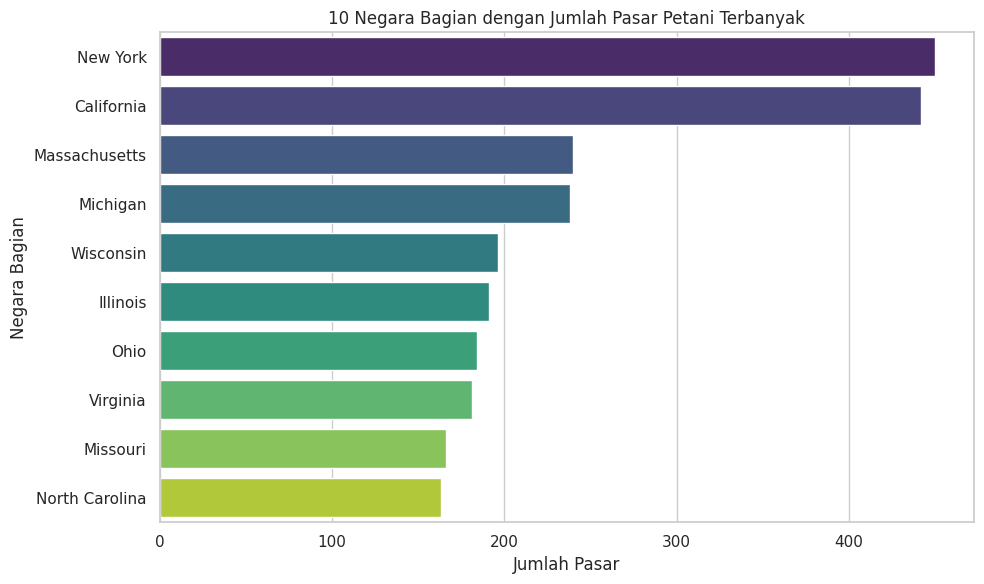

In [7]:
# Negara bagian dengan jumlah pasar terbanyak
top_states = df['state'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")
plt.title("10 Negara Bagian dengan Jumlah Pasar Petani Terbanyak")
plt.xlabel("Jumlah Pasar")
plt.ylabel("Negara Bagian")
plt.tight_layout()
plt.show()

**Sebaran Produk Paling Banyak Dijual**

Menampilkan 10 produk yang paling sering tersedia di pasar petani.

<ipython-input-8-0d5e9785a251>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_totals.values[:10], y=product_totals.index[:10], palette="cubehelix")


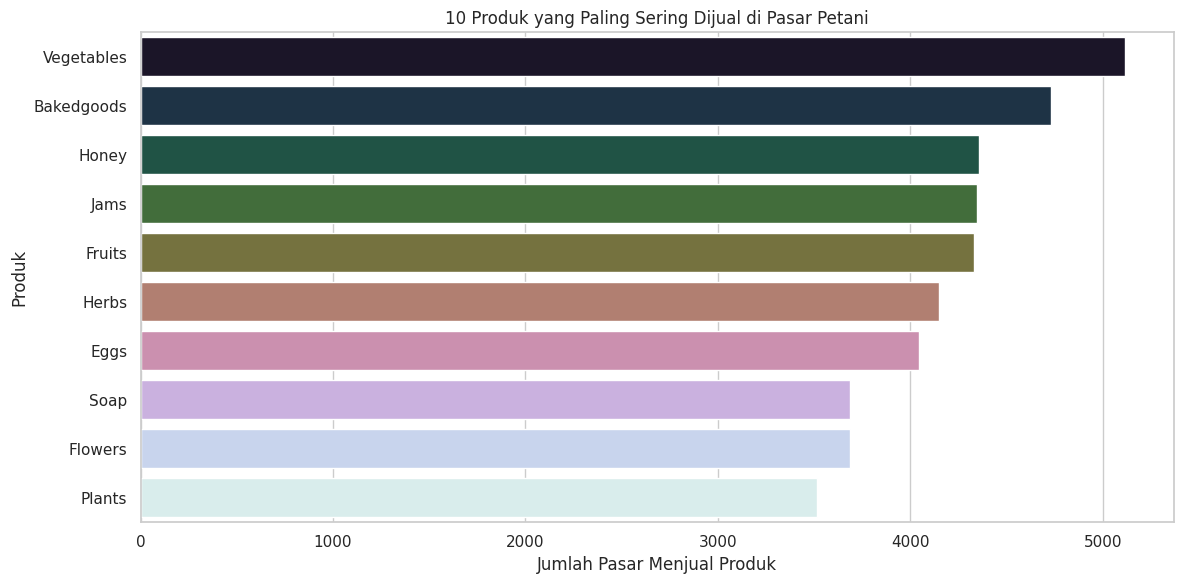

In [8]:
# Ambil semua kolom produk (antara kolom ke-8 hingga ke-36)
product_columns = df.columns[8:37]
product_totals = df[product_columns].sum().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=product_totals.values[:10], y=product_totals.index[:10], palette="cubehelix")
plt.title("10 Produk yang Paling Sering Dijual di Pasar Petani")
plt.xlabel("Jumlah Pasar Menjual Produk")
plt.ylabel("Produk")
plt.tight_layout()
plt.show()

**Korelasi antara Jumlah Barang yang Dijual dengan Lama Bulan Buka (months_open)**

Apakah semakin lama pasar buka, semakin banyak produk yang dijual?

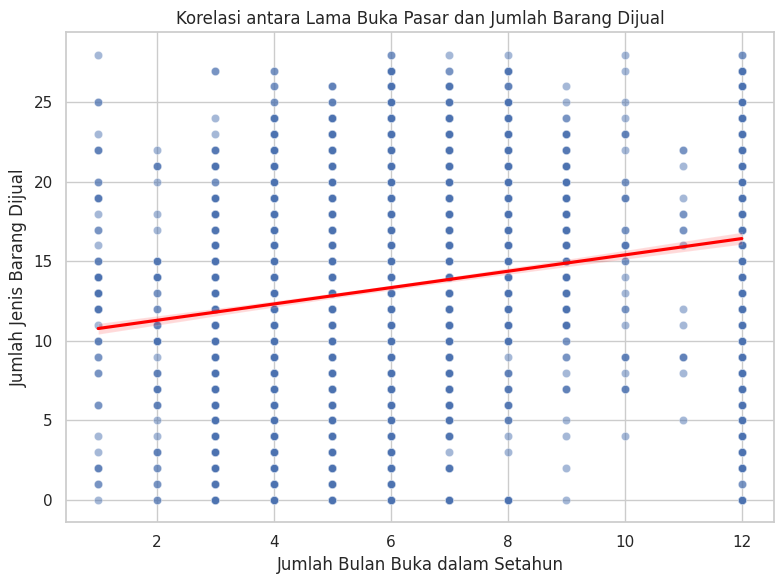

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='months_open', y='num_items_sold', data=df, alpha=0.5)
sns.regplot(x='months_open', y='num_items_sold', data=df, scatter=False, color='red')
plt.title("Korelasi antara Lama Buka Pasar dan Jumlah Barang Dijual")
plt.xlabel("Jumlah Bulan Buka dalam Setahun")
plt.ylabel("Jumlah Jenis Barang Dijual")
plt.tight_layout()
plt.show()

**Pemetaan Sederhana Lokasi Pasar**

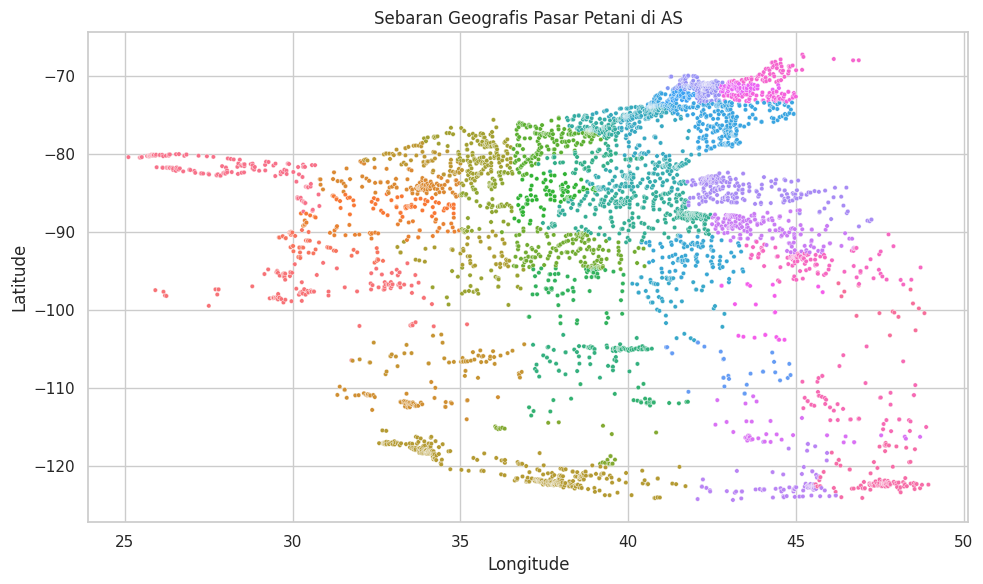

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lon', y='lat', data=df, hue='state', legend=False, s=10)
plt.title("Sebaran Geografis Pasar Petani di AS")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

**Hubungan antara Jumlah Pasar dan Populasi Negara Bagian**

Apakah negara bagian dengan populasi lebih besar cenderung memiliki lebih banyak pasar petani?

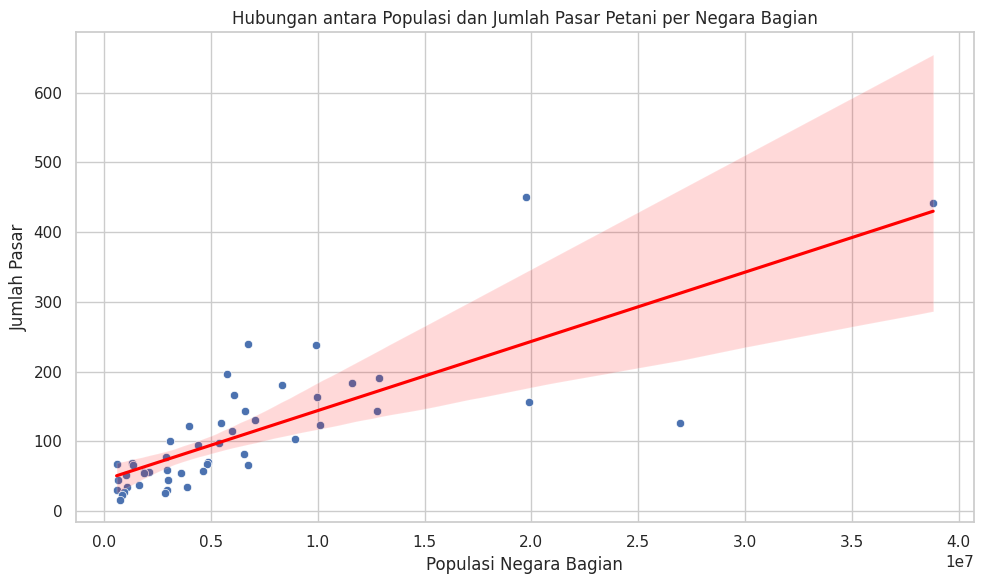

In [11]:
# Hitung jumlah pasar per negara bagian
state_market_count = df['state'].value_counts().rename_axis('state').reset_index(name='num_markets')

# Ambil populasi unik per negara bagian
state_population = df[['state', 'state_pop']].drop_duplicates()

# Gabungkan data
merged = pd.merge(state_market_count, state_population, on='state')

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='state_pop', y='num_markets', data=merged)
sns.regplot(x='state_pop', y='num_markets', data=merged, scatter=False, color='red')
plt.title("Hubungan antara Populasi dan Jumlah Pasar Petani per Negara Bagian")
plt.xlabel("Populasi Negara Bagian")
plt.ylabel("Jumlah Pasar")
plt.tight_layout()
plt.show()

**Heatmap Korelasi Antar Produk**

 Apakah pasar yang menjual sayuran juga cenderung menjual buah? Atau roti dengan madu?

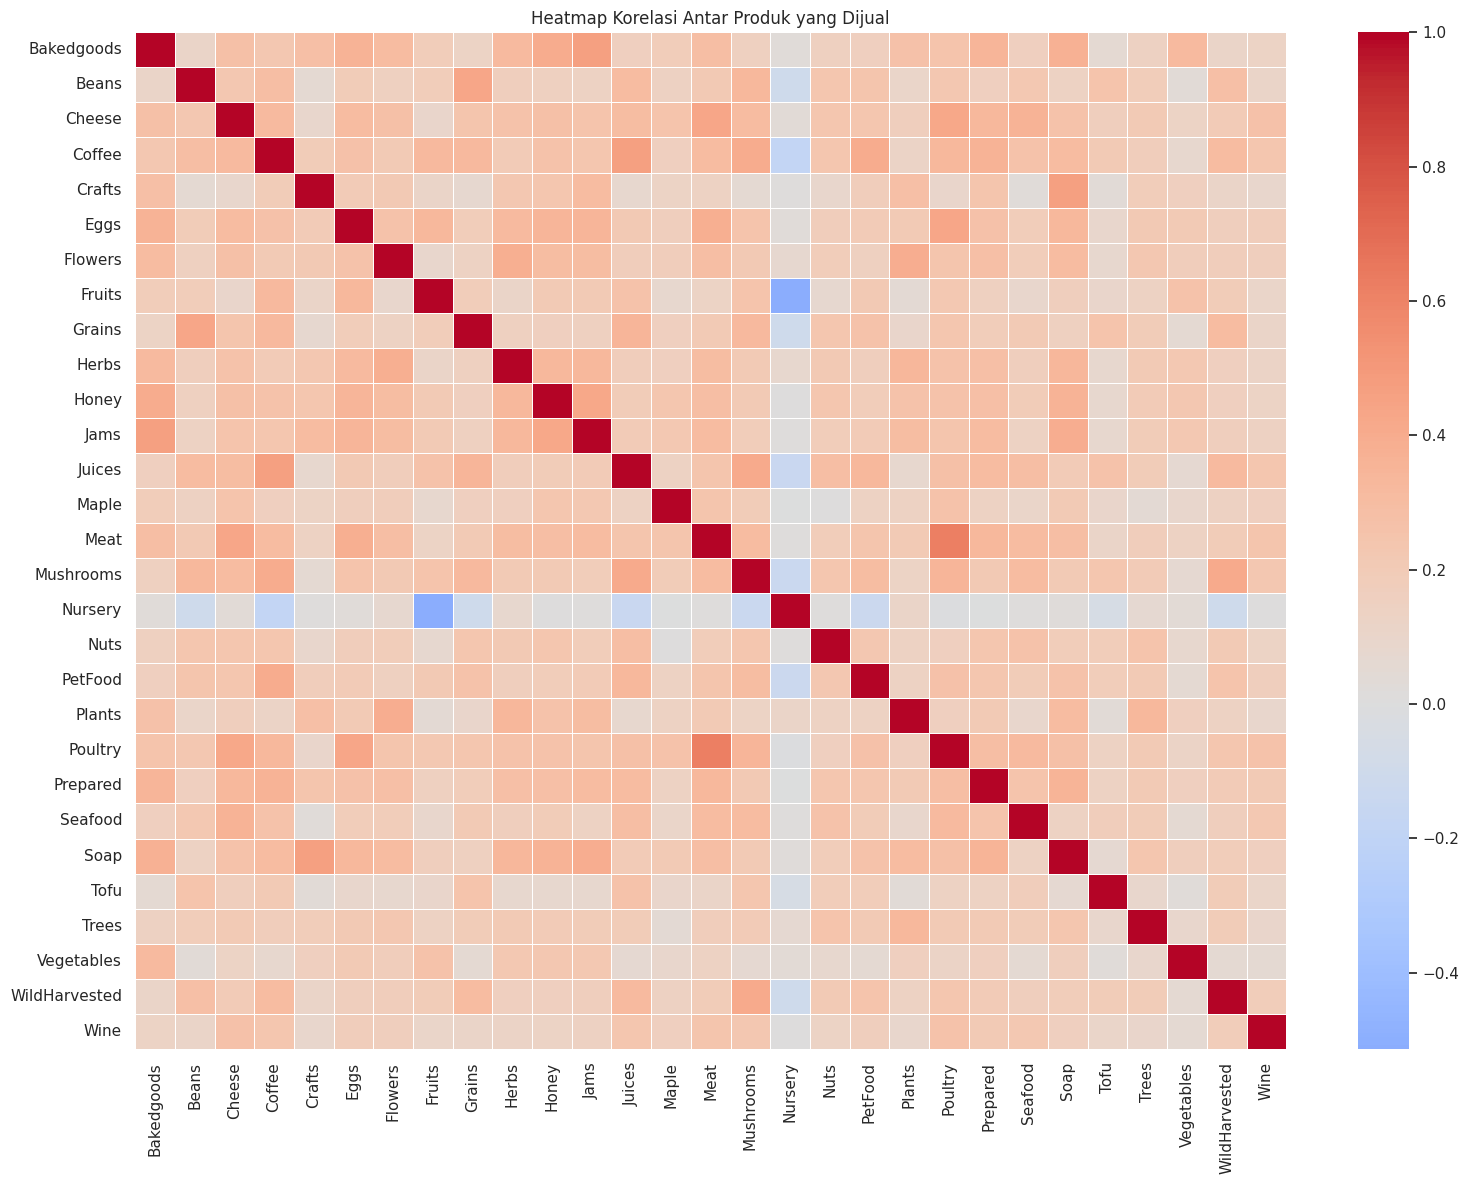

In [12]:
# Pilih hanya kolom produk (boolean 0/1)
product_columns = df.columns[8:37]
product_corr = df[product_columns].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(16, 12))
sns.heatmap(product_corr, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Heatmap Korelasi Antar Produk yang Dijual")
plt.tight_layout()
plt.show()

**Clustermap: Kelompok Produk yang Sering Dijual Bersamaan**

Produk-produk yang dikelompokkan berdekatan (secara vertikal dan horizontal) artinya sering dijual bersamaan.

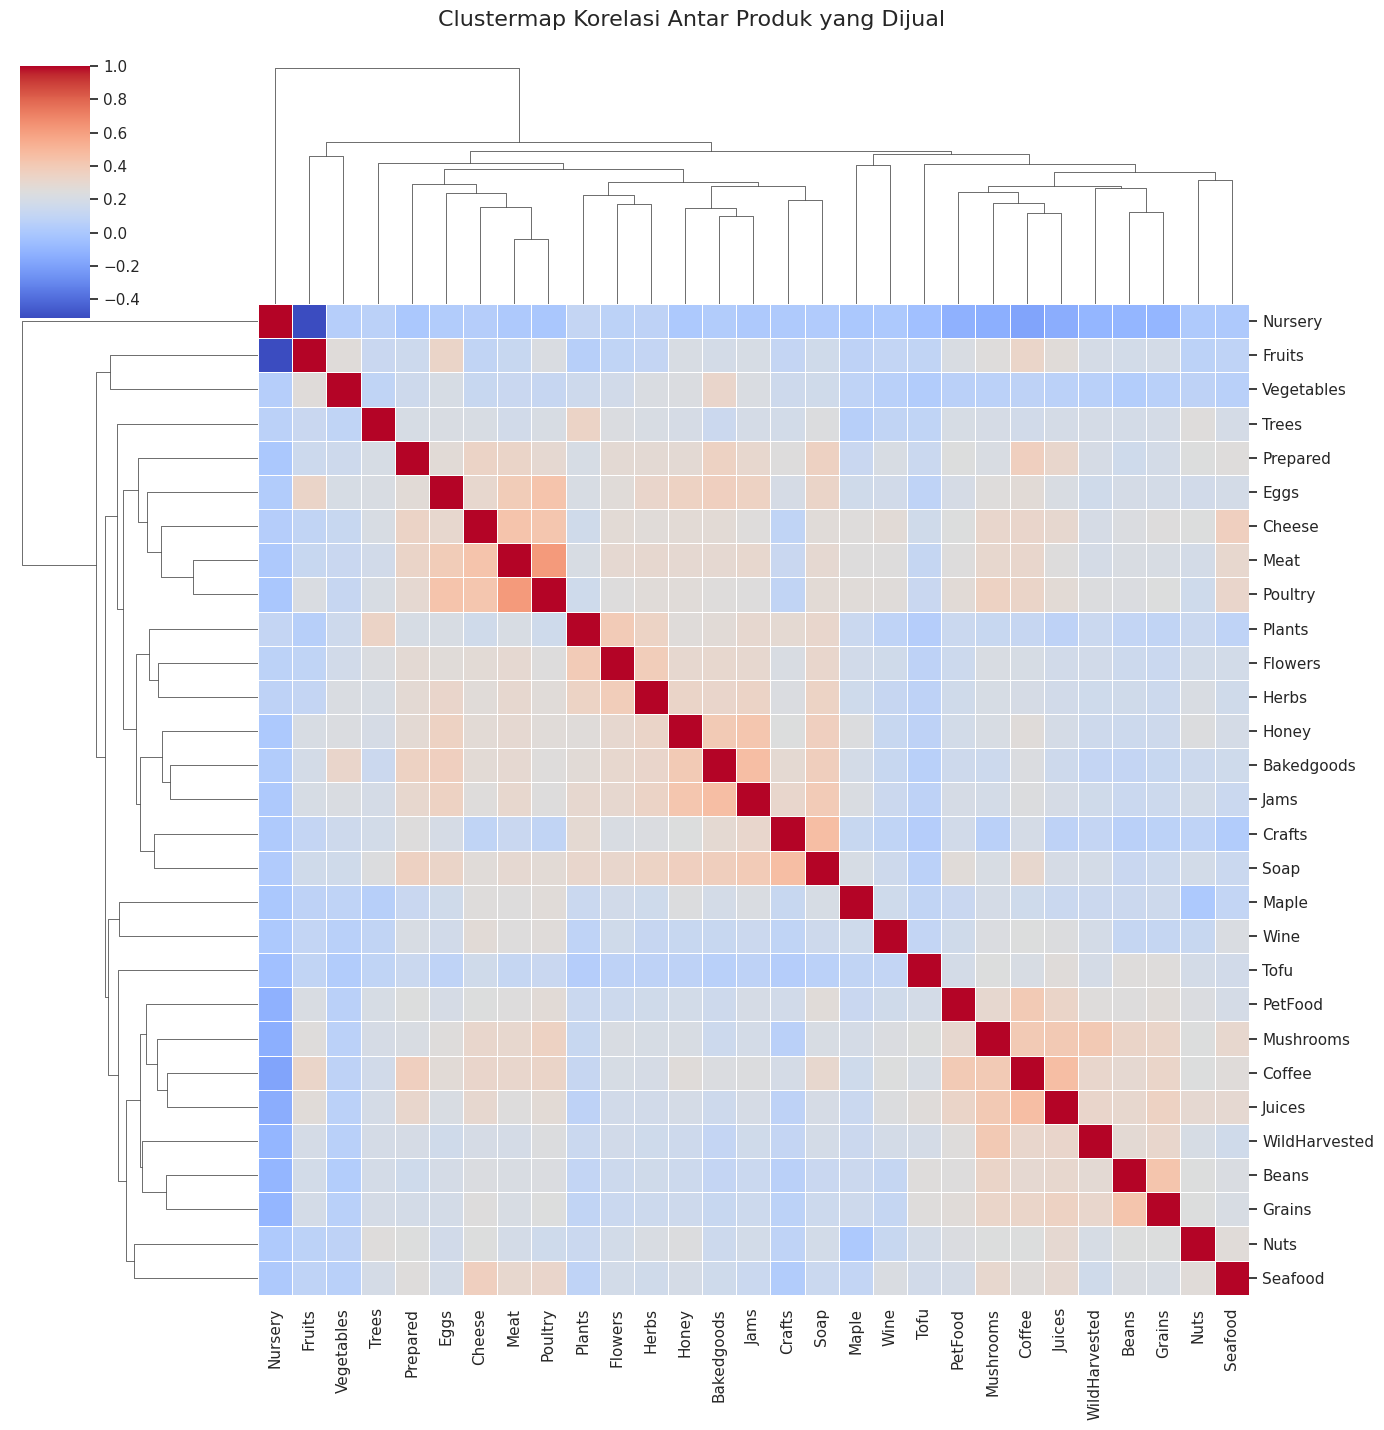

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil kolom produk
product_columns = df.columns[8:37]
product_corr = df[product_columns].corr()

# Buat clustermap
sns.clustermap(product_corr, cmap='coolwarm', linewidths=0.5, figsize=(14, 14), annot=False)
plt.suptitle("Clustermap Korelasi Antar Produk yang Dijual", fontsize=16, y=1.02)
plt.show()

**Heatmap Interaktif dengan Plotly**

In [14]:
import plotly.express as px
import pandas as pd

# Korelasi produk
product_corr = df[product_columns].corr()

# Plot interaktif
fig = px.imshow(
    product_corr,
    labels=dict(x="Produk", y="Produk", color="Korelasi"),
    x=product_corr.columns,
    y=product_corr.columns,
    color_continuous_scale='RdBu',
    title="Heatmap Interaktif Korelasi Antar Produk"
)
fig.update_layout(width=900, height=900)
fig.show()

**Langkah Segmentasi Pasar (K-Means Clustering)**

**Pemrosesan**

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil hanya kolom produk
product_data = df.iloc[:, 8:37]

# Standardisasi (opsional karena data 0/1, tapi aman dilakukan)
scaler = StandardScaler()
product_scaled = scaler.fit_transform(product_data)


**Menentukan Jumlah Cluster dengan Metode Elbow**

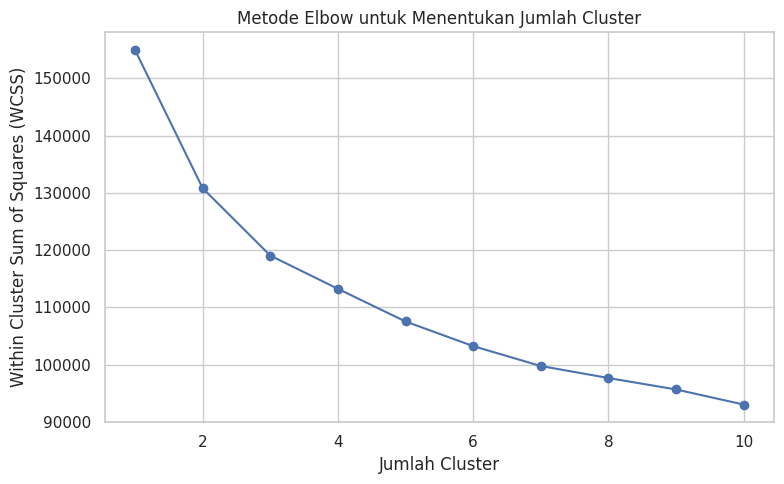

In [16]:
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(product_scaled)
    wcss.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Metode Elbow untuk Menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.grid(True)
plt.tight_layout()
plt.show()

**Membuat Cluster dan Visualisasikan dengan PCA**

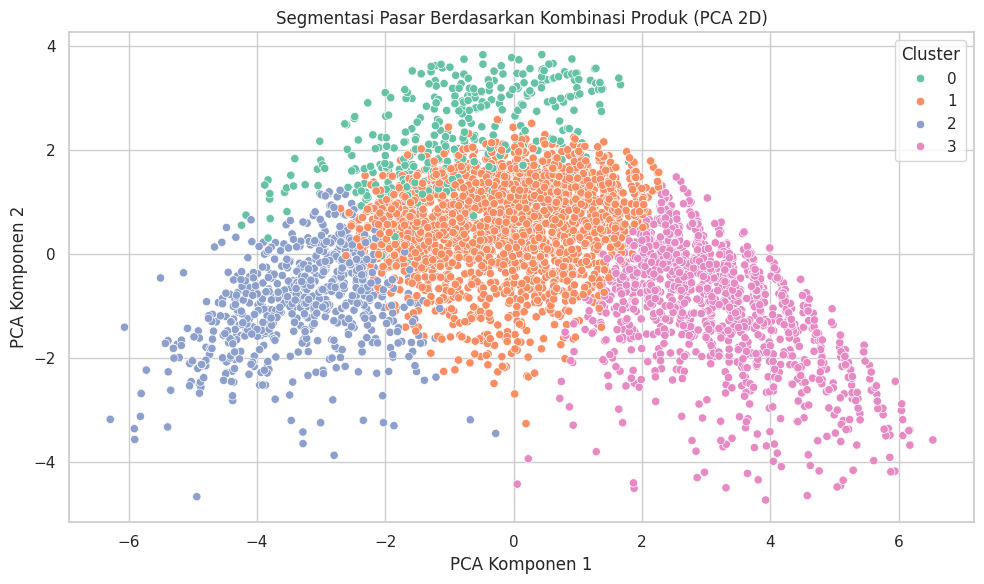

In [17]:
# Misalnya, pilih 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(product_scaled)

# Tambahkan ke DataFrame
df['cluster'] = clusters

# Reduksi dimensi untuk visualisasi (PCA 2D)
pca = PCA(n_components=2)
product_pca = pca.fit_transform(product_scaled)

# Visualisasi cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=product_pca[:, 0], y=product_pca[:, 1], hue=df['cluster'], palette="Set2")
plt.title("Segmentasi Pasar Berdasarkan Kombinasi Produk (PCA 2D)")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

**Menganalisis Tiap Cluster**

Cluster 0: Banyak menjual produk segar (sayur, buah, daging).

Cluster 1: Fokus pada makanan olahan (roti, madu, dll).

Cluster 2: Pasar kecil dengan variasi terbatas.

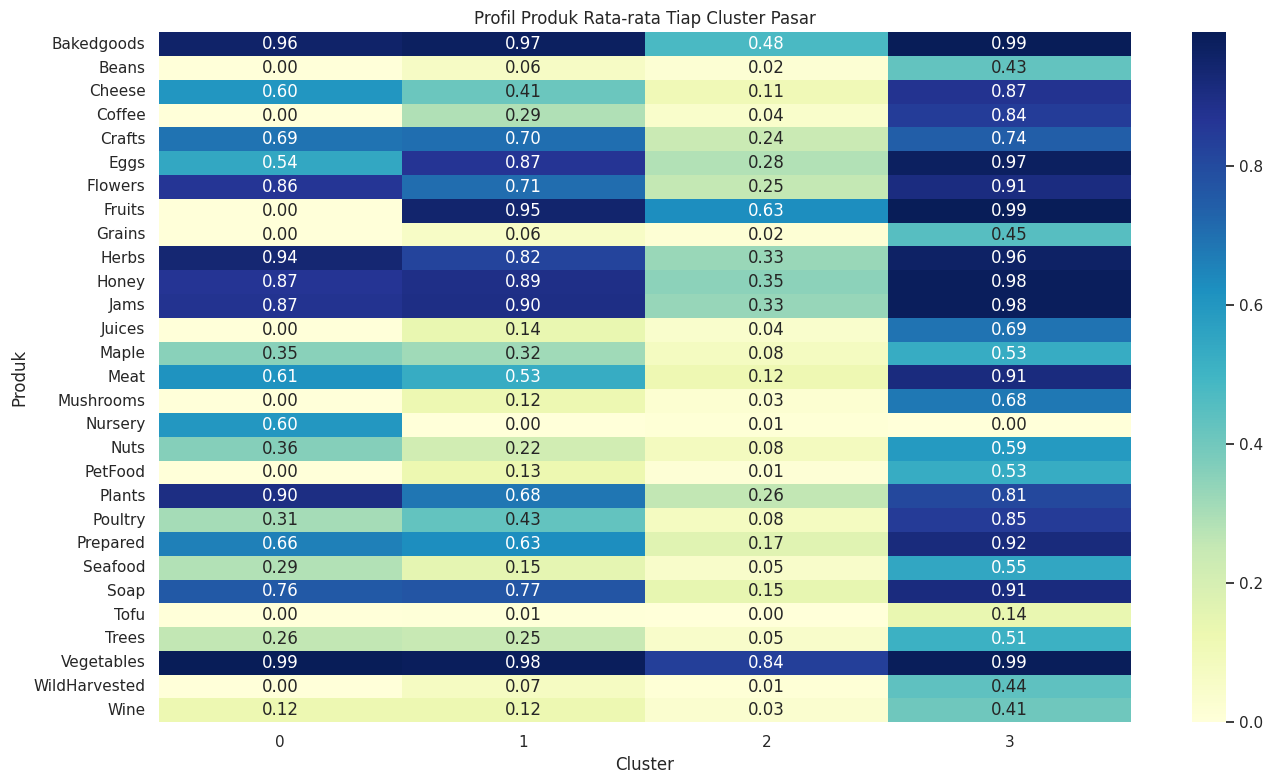

In [18]:
# Rata-rata distribusi produk per cluster
cluster_profiles = df.groupby('cluster')[product_data.columns].mean().T

# Tampilkan sebagai heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_profiles, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title("Profil Produk Rata-rata Tiap Cluster Pasar")
plt.xlabel("Cluster")
plt.ylabel("Produk")
plt.tight_layout()
plt.show()

**Map Data**

In [27]:
import folium
from folium.plugins import MarkerCluster

# Ambil lokasi pasar: latitude dan longitude
locations = df[['name', 'lat', 'lon', 'city', 'state']].dropna()

# Buat peta dasar yang terpusat di tengah AS
market_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Tambahkan marker cluster
marker_cluster = MarkerCluster().add_to(market_map)

# Tambahkan setiap pasar ke dalam peta
for _, row in locations.iterrows():
    popup_text = f"{row['name']}<br>{row['city']}, {row['state']}"
    folium.Marker(
        location=[row['lon'], row['lat']],
        popup=popup_text
    ).add_to(marker_cluster)

# Tampilkan peta
market_map

Kesimpulan umum:
Pasar petani di Amerika Serikat memiliki karakteristik musiman dengan fokus pada produk segar dan olahan lokal yang beragam.
Jumlah pasar yang menjual produk tertentu menunjukkan preferensi lokal dan ketersediaan produk di komunitas masing-masing.
Pasar petani memiliki peran penting dalam ekonomi lokal dan akses masyarakat terhadap makanan sehat.

Rekomendasi:
1. Melakukan analisis lebih dalam terkait distribusi produk di wilayah urban vs
rural.
2. Mendorong pengembangan pasar petani di wilayah dengan akses rendah dan potensi ekonomi yang belum tergarap.